In [1]:
import numpy as np
import pandas as pd

## Import Datasets

In [2]:
df = pd.read_csv('creditcard.csv')

##  Data Exploration

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
df[['Amount','Class']].describe()

,Amount,Class
count,284807.000000,284807.000000
mean,88.349619,0.001727
std,250.120109,0.041527
min,0.000000,0.000000
25%,5.600000,0.000000
50%,22.000000,0.000000
75%,77.165000,0.000000
max,25691.160000,1.000000


In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Modelling

### Scaling & Data Splitting

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaler.fit(df.drop(columns='Class'))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
scaled_df = scaler.transform(df.drop(columns='Class'))

In [10]:
pd.DataFrame(scaled_df,columns=df.columns[:-1])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,...,1.914365,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151
284803,1.641952,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,...,0.077330,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117
284804,1.641974,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,...,0.001811,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839
284805,1.641974,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,...,0.165300,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249


In [11]:
X = scaled_df
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

### Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\ebame_000\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
predictions = logmodel.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [16]:
print(confusion_matrix(y_test,predictions))

[[56851    13]
 [   35    63]]


In [17]:
print(logmodel.score(X_train, y_train), logmodel.score(X_test, y_test))

0.99923632293884 0.9991573329588147


In [87]:
logmodel.coef_

array([[-0.12906305,  0.1614418 ,  0.03510458, -0.04573181,  0.98495334,
         0.20063815, -0.13938352, -0.11531975, -0.17685672, -0.31721306,
        -0.84886183, -0.07814923,  0.14116674, -0.42903543, -0.54611261,
        -0.10911447, -0.23851413, -0.05291249,  0.02740962, -0.00378431,
        -0.36708737,  0.26256942,  0.40875768, -0.05009755,  0.03487596,
        -0.05400781,  0.01272862, -0.29995667, -0.07513091,  0.23266318]])

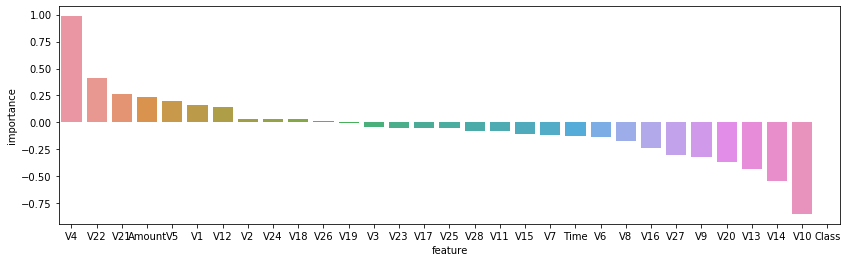

In [88]:
importance = pd.DataFrame([logmodel.coef_[0],df.columns]).transpose()
importance.columns=['importance','feature']
importance.sort_values(by=['importance'],ascending=False,inplace=True)
plt.figure(figsize=(14,4))
sns.barplot(x='feature',y='importance',data=importance)

In [100]:
fi_df = pd.DataFrame(scaled_df,columns=df.columns[:-1])[['V4','V22','V21','Amount','V5','V1','V12','V2','V24','V18','V26']]

In [101]:
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(fi_df, y, test_size=0.2, stratify=y, random_state=42)
X_log_train.shape, X_log_test.shape, y_log_train.shape, y_log_test.shape

((227845, 11), (56962, 11), (227845,), (56962,))

In [102]:
fi_logmodel = LogisticRegression()
fi_logmodel.fit(X_log_train,y_log_train)

C:\Users\ebame_000\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
predictions = fi_logmodel.predict(X_log_test)

In [104]:
print(classification_report(y_log_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.54      0.64        98

    accuracy                           1.00     56962
   macro avg       0.89      0.77      0.82     56962
weighted avg       1.00      1.00      1.00     56962



In [105]:
print(confusion_matrix(y_log_test,predictions))

[[56849    15]
 [   45    53]]


In [107]:
print(fi_logmodel.score(X_log_train, y_log_train), fi_logmodel.score(X_log_test, y_log_test))

0.9989993197129627 0.9989466661985184


### Random Forest Classification

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [19]:
rfc_pred = rfc.predict(X_test)

In [20]:
print(confusion_matrix(y_test,rfc_pred))

[[56859     5]
 [   18    80]]


In [21]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [22]:
print(rfc.score(X_train, y_train), rfc.score(X_test, y_test))

0.9999956110513727 0.9995962220427653


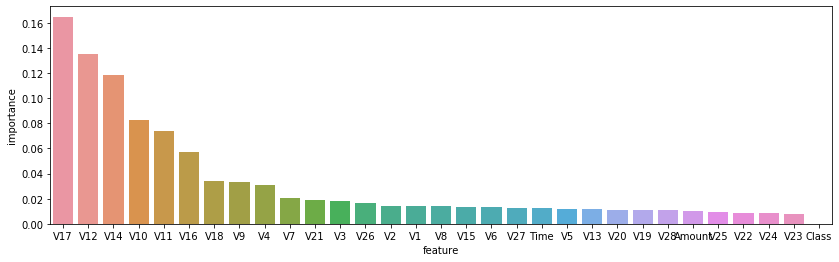

In [84]:
importance = pd.DataFrame([rfc.feature_importances_,df.columns]).transpose()
importance.columns=['importance','feature']
importance.sort_values(by=['importance'],ascending=False,inplace=True)
plt.figure(figsize=(14,4))
sns.barplot(x='feature',y='importance',data=importance)

### Artificial Neural Network

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [25]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [26]:
X = scaled_df
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [27]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 227845 samples, validate on 56962 samples
Epoch 1/600
227845/227845 [==============================] - 32s 139us/sample - loss: 0.0094 - val_loss: 0.0030
Epoch 2/600
227845/227845 [==============================] - 31s 134us/sample - loss: 0.0030 - val_loss: 0.0032
Epoch 3/600
227845/227845 [==============================] - 38s 169us/sample - loss: 0.0027 - val_loss: 0.0033
Epoch 4/600
227845/227845 [==============================] - 36s 160us/sample - loss: 0.0024 - val_loss: 0.0030
Epoch 5/600
227845/227845 [==============================] - 36s 158us/sample - loss: 0.0023 - val_loss: 0.0029
Epoch 6/600
227845/227845 [==============================] - 31s 135us/sample - loss: 0.0022 - val_loss: 0.0031
Epoch 7/600
227845/227845 [==============================] - 42s 184us/sample - loss: 0.0021 - val_loss: 0.0031
Epoch 8/600
227845/227845 [==============================] - 24s 105us/sample - loss: 0.0020 - val_loss: 0.0034
Epoch 9/600
227845/227845 [==========================

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

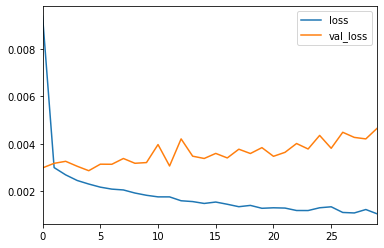

In [29]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [30]:
predictions = model.predict_classes(X_test)

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.84      0.82        98

    accuracy                           1.00     56962
   macro avg       0.90      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [32]:
print(confusion_matrix(y_test,predictions))

[[56843    21]
 [   16    82]]


### XGBoost

In [34]:
from xgboost import XGBClassifier

In [36]:
xgb = XGBClassifier(n_estimators=100,n_jobs=-1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
xgb_pred = xgb.predict(X_test)

In [38]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [39]:
print(confusion_matrix(y_test,xgb_pred))

[[56858     6]
 [   18    80]]


In [40]:
print(xgb.score(X_train, y_train), xgb.score(X_test, y_test))

1.0 0.9995786664794073


In [65]:
importance = pd.DataFrame([xgb.feature_importances_,df.columns]).transpose()

In [72]:
importance.columns=['importance','feature']

In [80]:
importance.sort_values(by=['importance'],ascending=False,inplace=True)

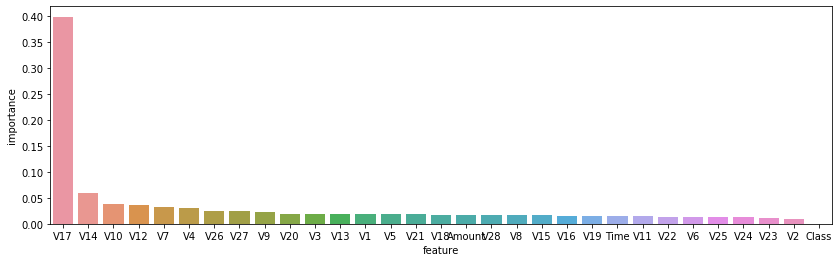

In [83]:
plt.figure(figsize=(14,4))
sns.barplot(x='feature',y='importance',data=importance)